In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Bài 3: Phân đoạn bằng Watershed - Watershed Segmentation

**Mục tiêu:**
- Nắm vững cách tách các đối tượng dính liền bằng thuật toán Watershed.

**Yêu cầu:**
- Chuyển ảnh sang nhị phân bằng Otsu
- Áp dụng Morphological operations (opening, closing) để loại nhiễu
- Xác định sure foreground, sure background và unknown region.
- Áp dụng cv2.watershed.
- Hiển thị biên phân tách đối tượng.

**Kết quả mong đợi:**
- Hiểu cơ chế Watershed dựa trên 'flooding' (ngập nước).
- Quan sát rõ biên tách các vật thể chạm nhau.
- Thấy vai trò quan trọng của các bước tiền xử lý (morphology, distance transform).

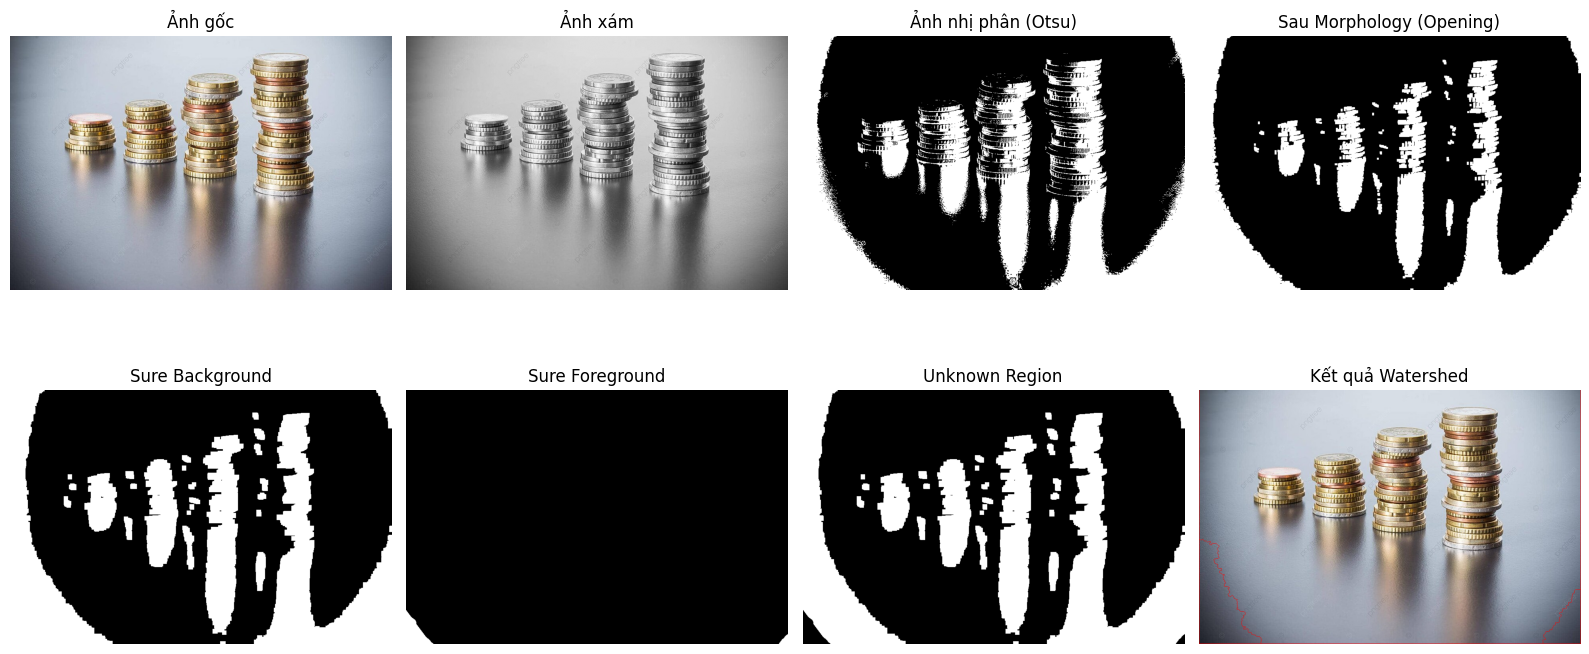

(array([[[255,   0,   0],
         [255,   0,   0],
         [255,   0,   0],
         ...,
         [255,   0,   0],
         [255,   0,   0],
         [255,   0,   0]],
 
        [[255,   0,   0],
         [ 72,  75,  84],
         [ 73,  76,  85],
         ...,
         [107, 119, 133],
         [105, 117, 131],
         [255,   0,   0]],
 
        [[255,   0,   0],
         [ 72,  75,  84],
         [ 73,  76,  85],
         ...,
         [107, 119, 133],
         [105, 117, 131],
         [255,   0,   0]],
 
        ...,
 
        [[255,   0,   0],
         [ 28,  28,  38],
         [ 30,  30,  40],
         ...,
         [ 48,  50,  62],
         [ 47,  49,  61],
         [255,   0,   0]],
 
        [[255,   0,   0],
         [ 28,  28,  38],
         [ 30,  30,  40],
         ...,
         [ 48,  50,  62],
         [ 47,  49,  61],
         [255,   0,   0]],
 
        [[255,   0,   0],
         [255,   0,   0],
         [255,   0,   0],
         ...,
         [255,   0,   0],
  

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation(img_path, show_steps=True):
    # 1. Đọc ảnh gốc
    img = cv2.imread(img_path)
    if img is None:
        print("Không thể đọc ảnh! Kiểm tra lại đường dẫn.")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 2. Threshold bằng Otsu
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 3. Morphological operations để loại nhiễu
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # 4. Distance Transform để tìm vùng tiền cảnh
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # 5. Xác định vùng chưa biết
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # 6. Đánh nhãn vùng liên thông
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # 7. Áp dụng Watershed
    markers = cv2.watershed(img, markers)
    img_watershed = img.copy()
    img_watershed[markers == -1] = [255, 0, 0]

    # 8. Hiển thị kết quả
    if show_steps:
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        ax = axes.ravel()

        ax[0].imshow(img); ax[0].set_title("Ảnh gốc"); ax[0].axis('off')
        ax[1].imshow(gray, cmap='gray'); ax[1].set_title("Ảnh xám"); ax[1].axis('off')
        ax[2].imshow(thresh, cmap='gray'); ax[2].set_title("Ảnh nhị phân (Otsu)"); ax[2].axis('off')
        ax[3].imshow(opening, cmap='gray'); ax[3].set_title("Sau Morphology (Opening)"); ax[3].axis('off')
        ax[4].imshow(sure_bg, cmap='gray'); ax[4].set_title("Sure Background"); ax[4].axis('off')
        ax[5].imshow(sure_fg, cmap='gray'); ax[5].set_title("Sure Foreground"); ax[5].axis('off')
        ax[6].imshow(unknown, cmap='gray'); ax[6].set_title("Unknown Region"); ax[6].axis('off')
        ax[7].imshow(img_watershed); ax[7].set_title("Kết quả Watershed"); ax[7].axis('off')

        plt.tight_layout()
        plt.show()

    return img_watershed, markers


# Test
watershed_segmentation('/content/drive/MyDrive/IP_2025/Tieu_Luan_3/img/Dong_Xu.jpg')


# Bài 4: Xác định đối tượng bằng Connected Components và Contour

**Mục tiêu:**
- Sử dụng Connected Components và Contour để phát hiện và biểu diễn đối tượng trong ảnh.

**Yêu cầu:**
- Áp dụng cv2.connectedComponents để đnahs nhãn các vùng liên thông.
- Sử dụng cv2.findContours để trích xuất biên đối tượng.
- Xuất tọa độ contour ra file.
- Mở rộng: Vẽ bounding box hoặc convex hull quanh đối tượng.

**Kết quả mong đợi:**
- Hiểu sự khác nhau gữa connected Components và Contour.
- Có khả năng đếm số đối tượng trong ảnh.
- Biết cách biểu diễn đối tượng bằng các đặc trưng hình học.

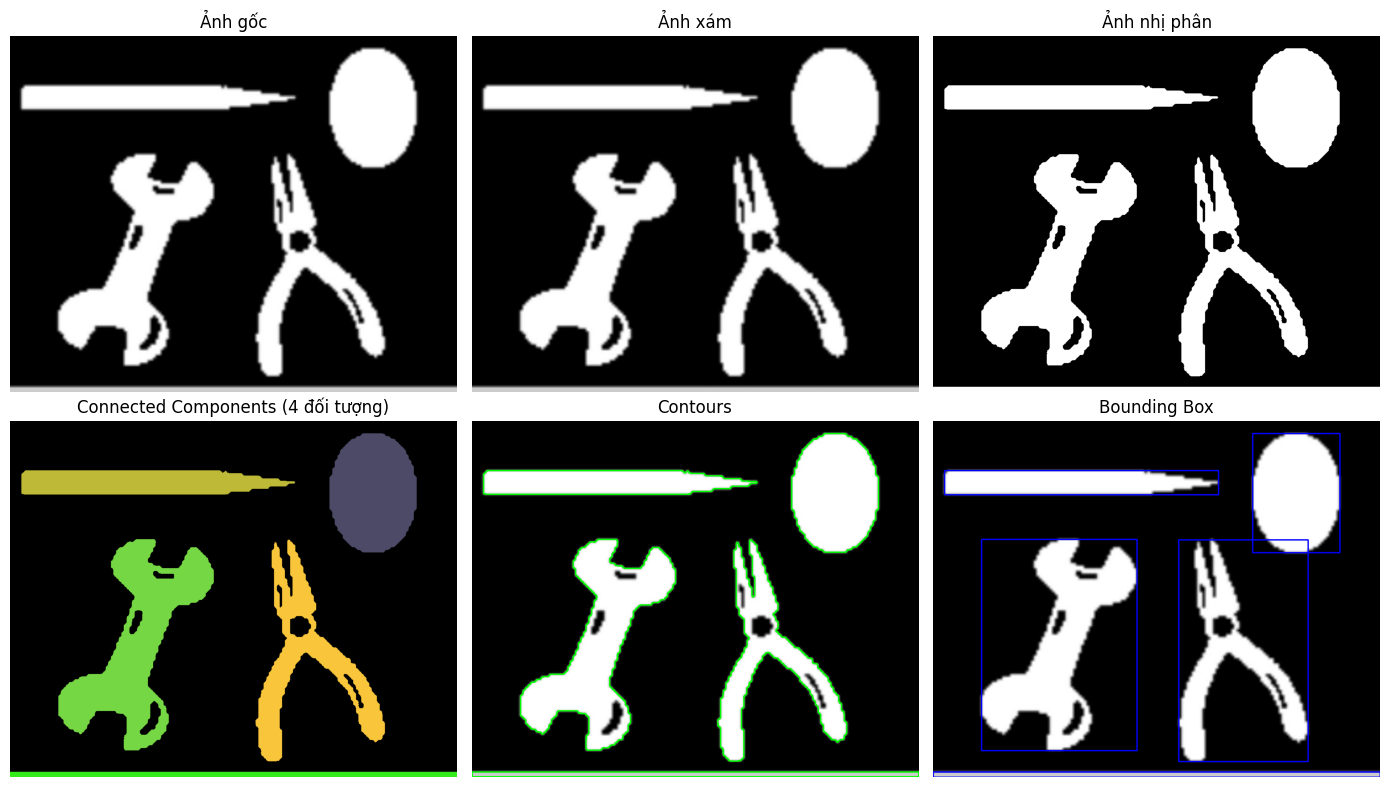

(5,
 (array([[[  0, 741]],
  
         [[  0, 751]],
  
         [[942, 751]],
  
         [[942, 741]]], dtype=int32),
  array([[[587, 252]],
  
         [[585, 254]],
  
         [[585, 280]],
  
         ...,
  
         [[590, 254]],
  
         [[590, 253]],
  
         [[589, 252]]], dtype=int32),
  array([[[266, 251]],
  
         [[265, 252]],
  
         [[264, 252]],
  
         ...,
  
         [[306, 255]],
  
         [[306, 253]],
  
         [[304, 251]]], dtype=int32),
  array([[[ 32, 106]],
  
         [[ 26, 112]],
  
         [[ 25, 112]],
  
         [[ 25, 113]],
  
         [[ 24, 114]],
  
         [[ 24, 154]],
  
         [[ 25, 155]],
  
         [[ 28, 155]],
  
         [[ 29, 156]],
  
         [[455, 156]],
  
         [[456, 155]],
  
         [[457, 156]],
  
         [[458, 156]],
  
         [[459, 155]],
  
         [[460, 155]],
  
         [[462, 153]],
  
         [[463, 153]],
  
         [[463, 152]],
  
         [[464, 151]],
  
         [[465, 

In [18]:
def detect_objects(img_path, output_contour_file="contours.txt", show_steps=True):
    # 1 Đọc ảnh
    img = cv2.imread(img_path)
    if img is None:
        print("Không thể đọc ảnh! Kiểm tra lại đường dẫn.")
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 2 Nhị phân hóa ảnh (threshold Otsu)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3 Connected Components
    num_labels, labels = cv2.connectedComponents(binary)

    # Tạo ảnh tô màu từng vùng liên thông
    label_img = np.zeros_like(img)
    for i in range(1, num_labels):  # bỏ nền = 0
        mask = (labels == i)
        color = np.random.randint(0, 255, 3)
        label_img[mask] = color

    # 4 Contour detection
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = img.copy()
    cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

    # 5 Ghi toạ độ contour ra file
    with open(output_contour_file, "w") as f:
        for i, contour in enumerate(contours):
            f.write(f"Contour {i+1}:\n{contour.reshape(-1, 2)}\n\n")

    # 6 Vẽ bounding box quanh các đối tượng
    box_img = img.copy()
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(box_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # 7 Hiển thị kết quả
    if show_steps:
        fig, ax = plt.subplots(2, 3, figsize=(14, 8))
        ax = ax.ravel()

        ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); ax[0].set_title("Ảnh gốc"); ax[0].axis('off')
        ax[1].imshow(gray, cmap='gray'); ax[1].set_title("Ảnh xám"); ax[1].axis('off')
        ax[2].imshow(binary, cmap='gray'); ax[2].set_title("Ảnh nhị phân"); ax[2].axis('off')
        ax[3].imshow(cv2.cvtColor(label_img, cv2.COLOR_BGR2RGB)); ax[3].set_title(f"Connected Components ({num_labels-2} đối tượng)"); ax[3].axis('off')
        ax[4].imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)); ax[4].set_title("Contours"); ax[4].axis('off')
        ax[5].imshow(cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)); ax[5].set_title("Bounding Box"); ax[5].axis('off')

        plt.tight_layout()
        plt.show()

    return num_labels-1, contours, labels

# Test
detect_objects("/content/drive/MyDrive/IP_2025/Tieu_Luan_3/img/Bai_4.jpg")


# Bài 5: Biểu diễn biên - Boundary Representation
**Mục tiêu:**
- Biểu diễn và mã hóa biên đối tượng bằng chain code và so sánh với contour OpenCV.

**Yêu cầu:**
- Biểu diễn biên bằng chain code (Freeman code).
- So sánh chain code với contour thu được từ OpenCV.
- Mở rộng: Ứng dụng trong nhận diện chữ viết tay hoặc chữ ký số.

**Kết quả mong đợi:**
- Biết cách mã hóa biên dưới dạng dãy số.
- Hiểu sự khác biệt giữa chain code và contour vector.
- Nhận ra ứng dụng trong nhận diện mẫu (patten recognition).

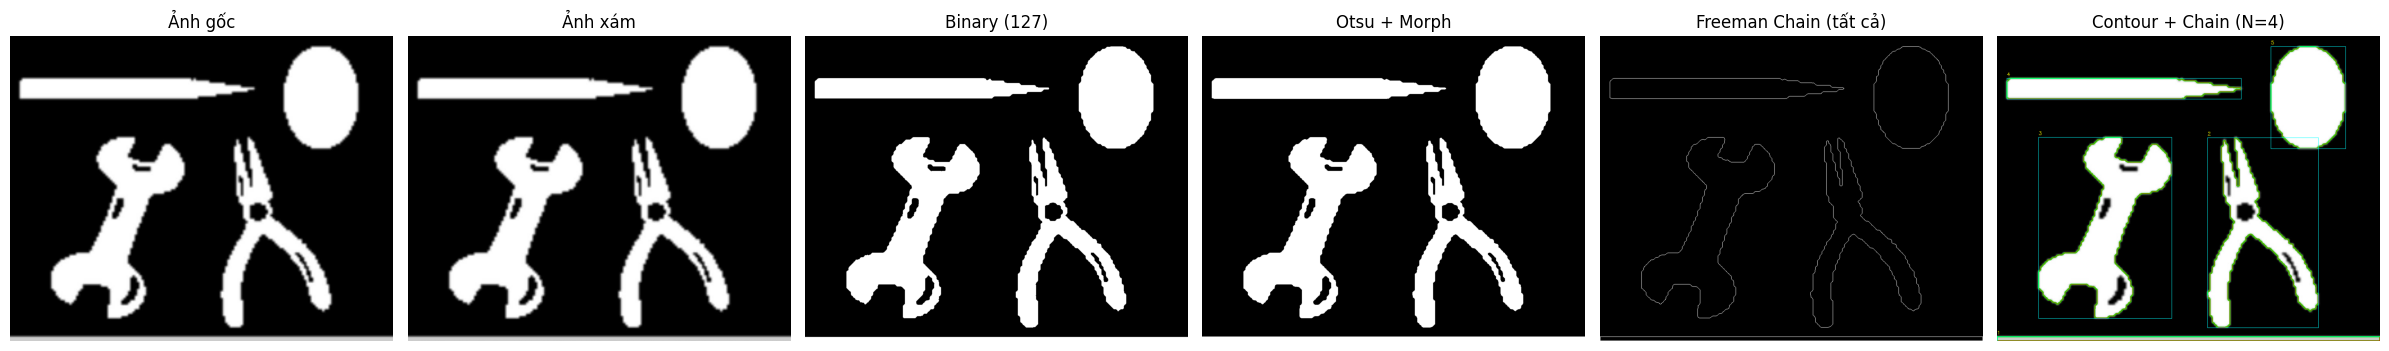

ConnectedComponents (after Otsu+morph) count (area>min_area): 5
Contours (filtered by min_area): 5
  - Contour 1: contour_pts=1904, chain_len=1904 (show first 8): [6, 6, 6, 6, 6, 6, 6, 6]
  - Contour 2: contour_pts=1682, chain_len=1682 (show first 8): [5, 4, 5, 6, 6, 6, 6, 6]
  - Contour 3: contour_pts=1463, chain_len=1463 (show first 8): [5, 4, 5, 5, 5, 5, 4, 5]
  - Contour 4: contour_pts=1198, chain_len=1198 (show first 8): [5, 4, 5, 5, 5, 5, 5, 4]
  - Contour 5: contour_pts=659, chain_len=659 (show first 8): [5, 4, 5, 4, 6, 5, 5, 4]


{'img_rgb': array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[204, 204, 204],
         [204, 204, 204],
         [204, 204, 204],
         ...,
         [204, 204, 204],
         [204, 204, 204],
         [204, 204, 204]],
 
        [[204, 204, 204],
         [204, 204, 204],
         [204, 204, 204],
         ...,
         [204, 204, 204],
         [204, 204, 204],
         [204, 204, 204]],
 
        [[204, 204, 204],
         [204, 204, 204],
         [204, 204, 204],
         ...,
         [204, 20

In [40]:
import random

def freeman_chain_code_for_contour(cnt):

    direction_map = {
        (1, 0): 0, (1, -1): 1, (0, -1): 2, (-1, -1): 3,
        (-1, 0): 4, (-1, 1): 5, (0, 1): 6, (1, 1): 7
    }
    chain = []
    pts = cnt.squeeze()
    # Đảm bảo contour đóng vòng: thêm điểm đầu vào cuối nếu chưa có
    if (pts[0] != pts[-1]).any():
        pts = np.vstack([pts, pts[0]])

  # Duyệt từng cặp điểm liên tiếp và lấy hướng (theo sign của dx, dy)
    for i in range(len(pts)-1):
        dx = int(pts[i+1][0]) - int(pts[i][0])
        dy = int(pts[i+1][1]) - int(pts[i][1])
        key = (np.sign(dx), np.sign(dy))
        dirv = direction_map.get(key)

        # nếu hướng hợp lệ (nằm trong 8 hướng), thêm vào chain
        if dirv is not None:
            chain.append(dirv)
    return chain

def visualize_chain_on_blank(cnt, shape):

    img = np.zeros(shape, dtype=np.uint8)
    pts = cnt.squeeze()

    # đóng contour nếu cần
    if (pts[0] != pts[-1]).any():
        pts = np.vstack([pts, pts[0]])

    # vẽ từng đoạn nối giữa điểm i và i+1
    for i in range(len(pts)-1):
        x1,y1 = int(pts[i][0]), int(pts[i][1])
        x2,y2 = int(pts[i+1][0]), int(pts[i+1][1])
        cv2.line(img, (x1,y1), (x2,y2), 255, 1)
    return img

def boundary_representation_freeman(img_path, min_area=200, show_steps=True):

    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        print("Không thể đọc ảnh:", img_path)
        return None
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Binary cố định (dành để so sánh)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    # Otsu
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Đảo màu nếu cần (muốn vật thể = trắng, nền = đen)
    if np.mean(otsu) > 127:
        otsu = 255 - otsu
    if np.mean(binary) > 127:
        binary_inv = 255 - binary
    else:
        binary_inv = binary.copy()

    # Morphological: mở để loại cầu nối nhỏ giữa đối tượng
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    otsu_m = cv2.morphologyEx(otsu, cv2.MORPH_OPEN, kernel, iterations=1)
    otsu_m = cv2.morphologyEx(otsu_m, cv2.MORPH_CLOSE, kernel, iterations=1)

    # Tách vùng nhỏ: connected components trên otsu_m để so sánh
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(otsu_m, connectivity=8)
    cc_count = 0
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= min_area:
            cc_count += 1

    # Tìm contour
    contours, hierarchy = cv2.findContours(otsu_m, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Lọc contour theo diện tích min_area
    filtered = []
    for cnt in contours:
        a = cv2.contourArea(cnt)
        if a >= min_area:
            filtered.append(cnt)
    contours = filtered

    # Chuẩn bị ảnh vẽ: chain_all (grayscale), combo color (contour + chain)
    chain_all = np.zeros_like(gray)
    combo = img_rgb.copy()

    chain_codes = []
    # màu cho mỗi contour
    for i, cnt in enumerate(contours):
        chain = freeman_chain_code_for_contour(cnt)
        chain_codes.append(chain)

        path = visualize_chain_on_blank(cnt, gray.shape)

        # Ghép ảnh bằng phép OR
        chain_all = cv2.bitwise_or(chain_all, path)

        # vẽ contour (green) và chain path (blue) on combo
        color = tuple(np.random.randint(0,255,3).tolist())
        cv2.drawContours(combo, [cnt], -1, (0,255,0), 2)

        # Gán màu xanh
        ys, xs = np.where(path==255)
        for (y,x) in zip(ys, xs):
            # draw pixel with color (clip)
            combo[y, x] = (255, 0, 0)

    # Vẽ bounding box và chỉ số cho từng contour
    for idx, cnt in enumerate(contours, start=1):
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(combo, (x,y), (x+w,y+h), (0,255,255), 1)
        cv2.putText(combo, str(idx), (x, y-6), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,0), 1)

    if show_steps:
        fig, axes = plt.subplots(1,6, figsize=(24,6))
        axes[0].imshow(img_rgb); axes[0].set_title("Ảnh gốc"); axes[0].axis('off')
        axes[1].imshow(gray, cmap='gray'); axes[1].set_title("Ảnh xám"); axes[1].axis('off')
        axes[2].imshow(binary_inv, cmap='gray'); axes[2].set_title("Binary (127)"); axes[2].axis('off')
        axes[3].imshow(otsu_m, cmap='gray'); axes[3].set_title("Otsu + Morph"); axes[3].axis('off')
        axes[4].imshow(chain_all, cmap='gray'); axes[4].set_title("Freeman Chain (tất cả)"); axes[4].axis('off')
        axes[5].imshow(combo); axes[5].set_title(f"Contour + Chain (N={len(contours)-1})"); axes[5].axis('off')
        plt.tight_layout()
        plt.show()

    # In thông số
    print("ConnectedComponents (after Otsu+morph) count (area>min_area):", cc_count)
    print("Contours (filtered by min_area):", len(contours))
    for i, ch in enumerate(chain_codes, start=1):
        print(f"  - Contour {i}: contour_pts={len(contours[i-1])}, chain_len={len(ch)} (show first 8): {ch[:8]}")

    return {
        "img_rgb": img_rgb,
        "gray": gray,
        "binary": binary_inv,
        "otsu_m": otsu_m,
        "chain_all": chain_all,
        "combo": combo,
        "contours": contours,
        "chain_codes": chain_codes
    }

# Ví dụ gọi:
boundary_representation_freeman("/content/drive/MyDrive/IP_2025/Tieu_Luan_3/img/Bai_4.jpg")  # Đổi sang ảnh của bạn
